## Smart Crop Advisor

In [1]:
#Import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading dataset
crop=pd.read_csv(r"D:\imarticus\capstone project\crop recommendation\crop project_main file\Crop_recommendation.csv")
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
crop.shape

(2200, 8)

In [4]:
crop.columns=['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','Ph','Rainfall','Crops']
crop.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'Ph',
       'Rainfall', 'Crops'],
      dtype='object')

In [5]:
#Missing values
crop.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
Ph             0
Rainfall       0
Crops          0
dtype: int64

In [6]:
crop.duplicated().sum()

0

In [7]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   Ph           2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crops        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
#Statistics summary
crop.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,Ph,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
#correlation
crop.corr()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,Ph,Rainfall
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
Phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
Potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
Temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
Humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
Ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
Rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

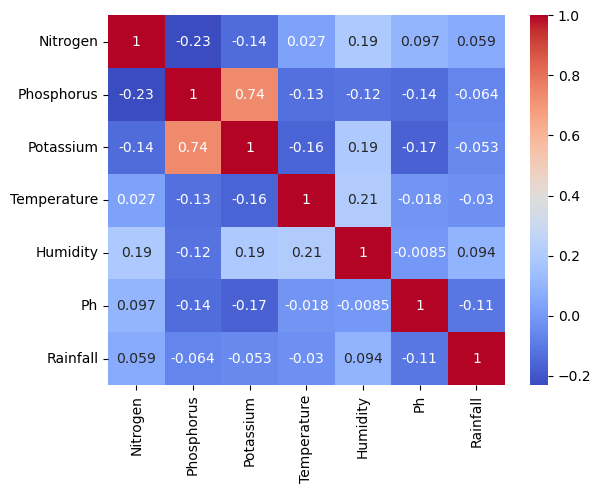

In [10]:
sns.heatmap(crop.corr(),annot=True,cmap='coolwarm')

In [11]:
#categorical variable(dependent)
crop['Crops'].nunique()

22

<Axes: xlabel='count', ylabel='Crops'>

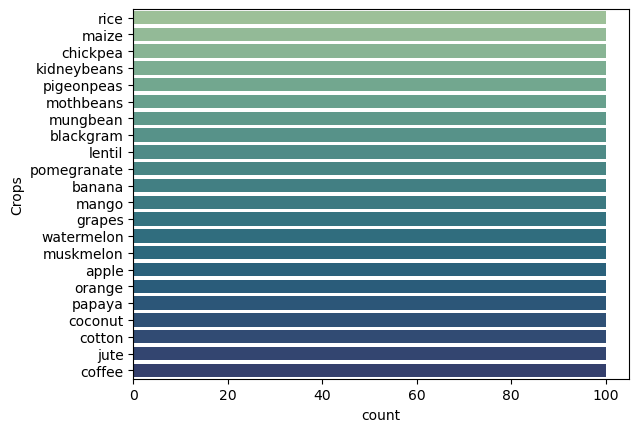

In [12]:
#categorical features
sns.countplot(y='Crops',data=crop,palette='crest')

In [13]:
crop['Crops'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: Crops, dtype: int64

In [14]:
#Seperating features and target
features = crop[['Nitrogen', 'Phosphorus','Potassium','Temperature', 'Humidity', 'Ph', 'Rainfall']]
target = crop['Crops']

In [16]:
# Initialzing empty lists to append all model's name and corresponding name
accuracy = []
model = []

In [15]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

### Random Forest

In [17]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

RFC = RandomForestClassifier(n_estimators=20, random_state=0)
RFC.fit(xtrain,ytrain)
predicted_values = RFC.predict(xtest)
X = metrics.accuracy_score(ytest, predicted_values)
accuracy.append(X)
model.append('Random Forest')
print("Random Forest Accuracy is: ", X)
print(classification_report(ytest,predicted_values))

Random Forest Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [18]:
# Cross validation score (Random Forest)
from sklearn.model_selection import cross_val_score
score = cross_val_score(RFC,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

<Axes: >

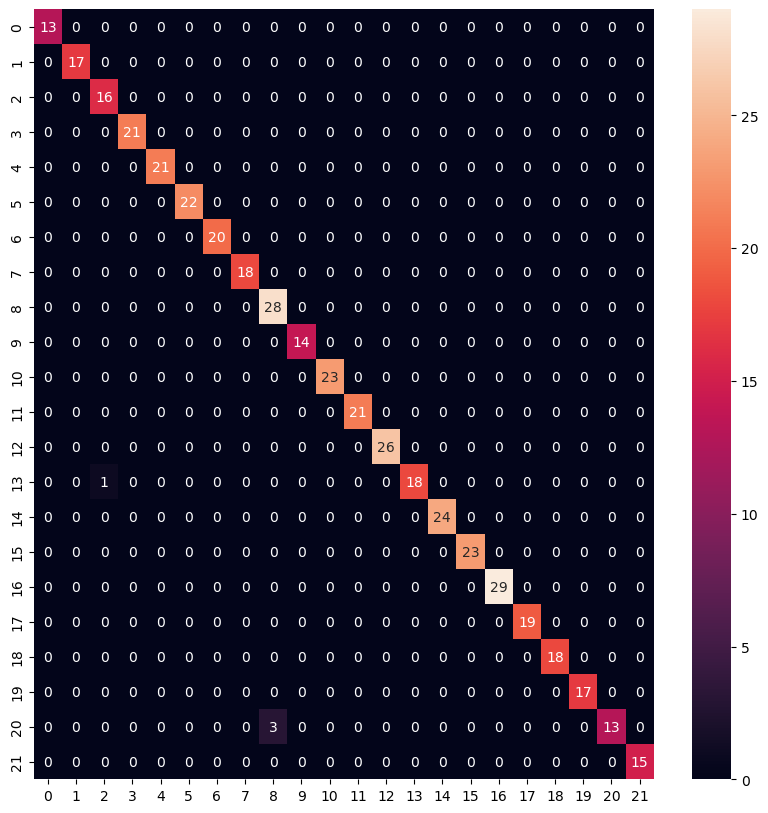

In [20]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_matrix(ytest, predicted_values), annot=True, ax=ax)

### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(xtrain,ytrain)
predicted_values = DecisionTree.predict(xtest)
X = metrics.accuracy_score(ytest, predicted_values)
accuracy.append(X)
model.append('DecisionTree')
print("DecisionTree Accuracy is: ",X*100)
print(classification_report(ytest,predicted_values))

DecisionTree Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00      

In [22]:
# Cross validation score
score = cross_val_score(DecisionTree,features,target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

<Axes: >

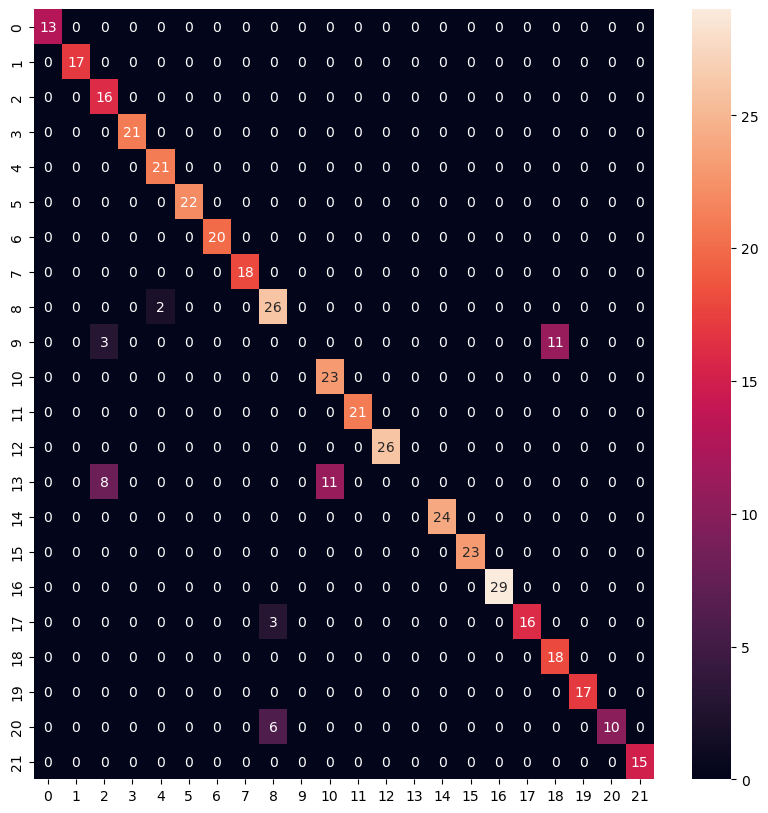

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_matrix(ytest, predicted_values), annot=True, ax=ax)

### Support Vector Machine (SVM)

In [24]:
from sklearn.svm import SVC
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(xtrain,ytrain)
predicted_values = SVM.predict(xtest)
X = metrics.accuracy_score(ytest, predicted_values)
accuracy.append(X)
model.append('SVM')
print("SVM Accuracy is: ", X)
print(classification_report(ytest,predicted_values))

SVM Accuracy is:  0.975
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.89      0.88        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
   

In [25]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

<Axes: >

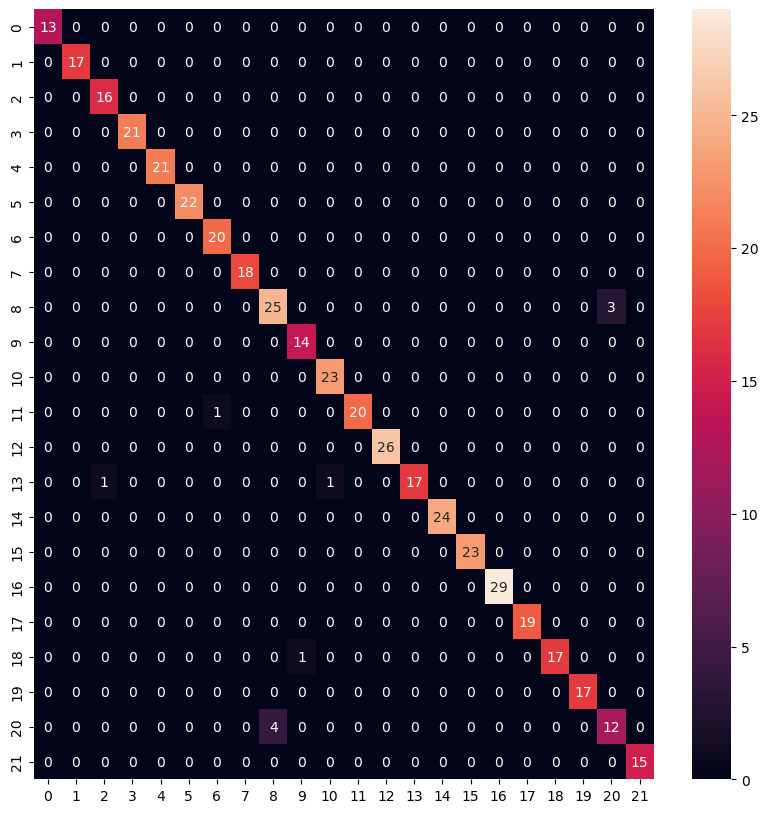

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_matrix(ytest, predicted_values), annot=True, ax=ax)

### K-Nearest Neighbors(KNN)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(xtrain,ytrain)
y_preds= knn.predict(xtest)
x= metrics.accuracy_score(ytest, y_preds)
accuracy.append(x)
model.append('KNN')
print('KNN Accuracy is :',x)
print(classification_report(ytest,y_preds))

KNN Accuracy is : 0.975
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
   

In [28]:
# Cross validation score (SVM)
score = cross_val_score(knn,features,target,cv=5)
score

array([0.97727273, 0.98181818, 0.97954545, 0.97954545, 0.97954545])

<Axes: >

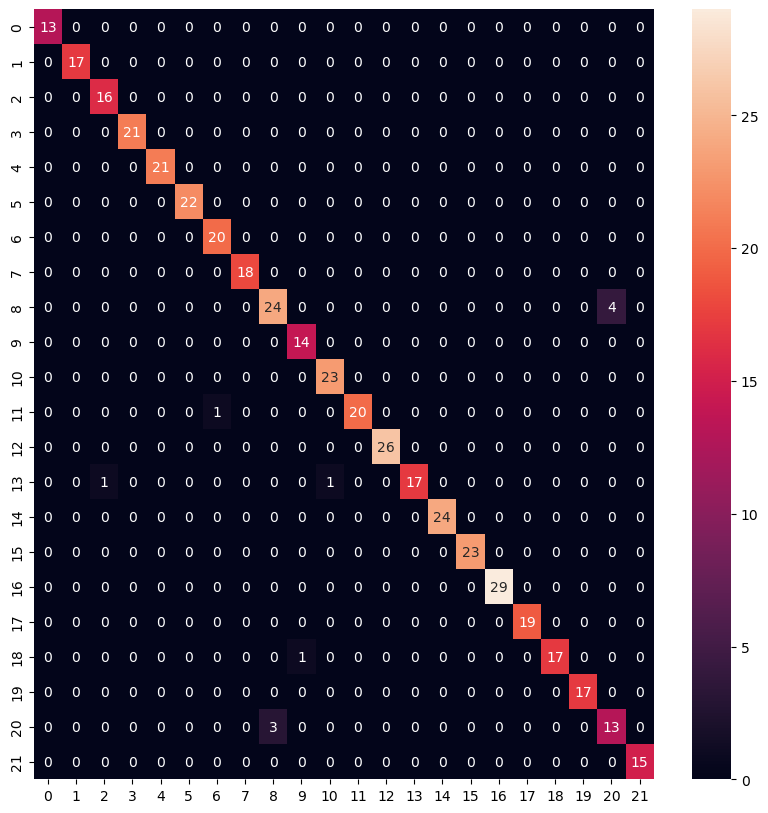

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_matrix(ytest, y_preds), annot=True, ax=ax)

### Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(xtrain,ytrain)
pred=GB.predict(xtest)
X=metrics.accuracy_score(ytest,pred)
accuracy.append(X)
model.append('Gradient boosting')
print("GradientBoosting accuracy is:",X)
print(classification_report(ytest,pred))

GradientBoosting accuracy is: 0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.93      0.96        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.96      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.95      1.00      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.0

In [31]:
# Cross validation score
score = cross_val_score(GB,features,target,cv=5)
score

array([0.99090909, 0.98863636, 0.99318182, 0.99545455, 0.98636364])

<Axes: >

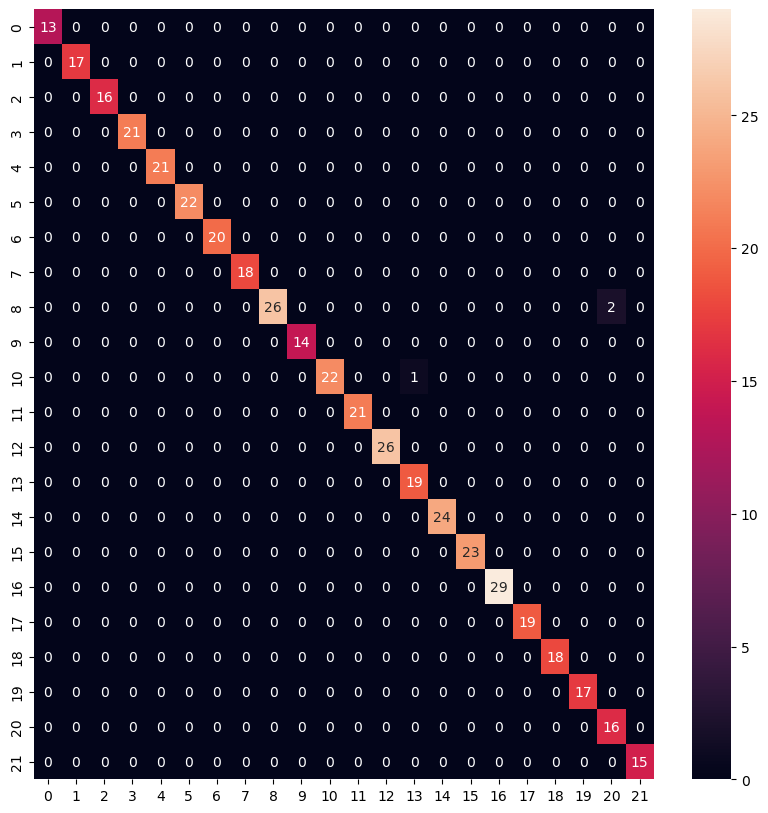

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_matrix(ytest,pred), annot=True, ax=ax)

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

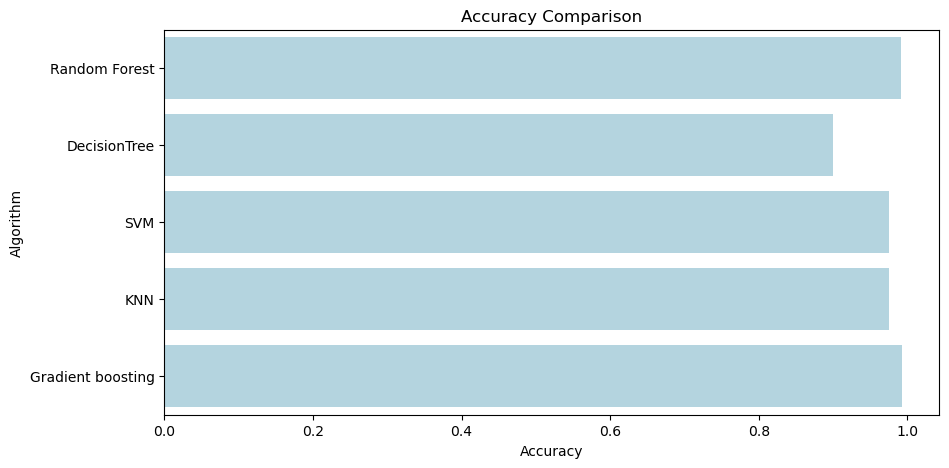

In [49]:
#Accuracy comparison
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = accuracy,y = model,color='lightblue')

In [50]:
# prediction
def recommendation(ni_value,pp_value,po_value,temp_value,humidity_value,ph_value,rainfall_value):
    features=np.array([[ni_value,pp_value,po_value,temp_value,humidity_value,ph_value,rainfall_value]])
    prediction=RFC.predict(features)
    string=" ".join([str(i) for i in prediction])
    
    return string.capitalize()

In [51]:
from PyQt5.uic import loadUi
from PyQt5.QtWidgets import QMainWindow, QApplication, QMessageBox
import sys
from PyQt5 import QtWidgets,QtGui



app = QApplication(sys.argv)
class MainWindow(QtWidgets.QMainWindow):
    def __init__(self):
        super(MainWindow, self).__init__()
        loadUi('crop.ui', self)
        self.show()
        self.predictbutton.clicked.connect(self.predict_crop)
        self.clearbutton.clicked.connect(self.resetall)
        self.nitrogenline.textChanged.connect(self.validatefloat)
        self.phosphorusline.textChanged.connect(self.validatefloat)
        self.potassiumline.textChanged.connect(self.validatefloat)
        self.templine.textChanged.connect(self.validatefloat)
        self.humidityline.textChanged.connect(self.validatefloat)
        self.phline.textChanged.connect(self.validatefloat)
        self.rainfallline.textChanged.connect(self.validatefloat)

        
    def predict_crop(self):
        ni_value=self.nitrogenline.text()
        pp_value=self.phosphorusline.text()
        po_value=self.potassiumline.text()
        temp_value=self.templine.text()
        humidity_value=self.humidityline.text()
        ph_value=self.phline.text()
        rainfall_value=self.rainfallline.text()
#         print("nitrogen:",ni_value)
#         print("phosphorus:",pp_value)
#         print("potassium:",po_value)
#         print("temperature:",temp_value)
#         print("humidity:",humidity_value)
#         print("ph:",ph_value)
#         print("rainfall:",rainfall_value)

        msg=QMessageBox()
        msg.setWindowTitle("Error")
        msg.setIcon(QMessageBox.Warning)
        if not ni_value:
            msg.setText("Please fill nitrogen value")
            msg.exec_()
        elif not pp_value:
            msg.setText("Please fill phosphorus value")
            msg.exec_()
        elif not po_value:
            msg.setText("Please fill potassium value")
            msg.exec_()
        elif not temp_value:
            msg.setText("Please fill temperature value")
            msg.exec_()
        elif not humidity_value:
            msg.setText("Please fill humidity value")
            msg.exec_()
        elif not ph_value:
            msg.setText("Please fill ph value")
            msg.exec_()
        elif not rainfall_value:
            msg.setText("Please fill rainfall value")
            msg.exec_()
        else:
            predict=recommendation(ni_value,pp_value,po_value,temp_value,humidity_value,ph_value,rainfall_value)
            print("{} is the best crop for you".format(predict))
            self.resultbox.setText("{} is the best crop for you".format(predict))
            
    def resetall(self):
        self.nitrogenline.clear()
        self.phosphorusline.clear()
        self.potassiumline.clear()
        self.templine.clear()
        self.humidityline.clear()
        self.phline.clear()
        self.rainfallline.clear()
        self.resultbox.clear()
        
    def validatefloat(self):
        sender=self.sender()
        text=sender.text()
        if text:
            try:
                float(text)
            except:
                msg=QMessageBox()
                msg.setWindowTitle("Error")
                msg.setIcon(QMessageBox.Warning)
                msg.setText("Only interger or float value is allowed, Please reenter")
                msg.exec_()
                sender.clear()


In [52]:
win=MainWindow()
sys.exit(app.exec_())


Coffee is the best crop for you


SystemExit: 0